Data Filtering

In [ ]:
import pandas as pd
import warnings
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

# First, we import the four csv files that we are going to use
df1 = pd.read_csv("C:/Users/mathi/Downloads/archive/caracteristics.csv", encoding='latin-1')
df2 = pd.read_csv("C:/Users/mathi/Downloads/archive/places.csv", encoding="latin-1")
df3 = pd.read_csv("C:/Users/mathi/Downloads/archive/users.csv", encoding="latin-1")
df4 = pd.read_csv("C:/Users/mathi/Downloads/archive/vehicles.csv", encoding="latin-1")

# Merge all the dataframes together using the column 'Num_Acc' that they have in common
df1 = pd.merge(df1, df2, how="outer", on="Num_Acc")
df2 = pd.merge(df3, df4, how='outer', on="Num_Acc")

data = pd.merge(df1, df2, how='outer', on="Num_Acc")

# Selection of the columns that we want to keep that we rename appropriately
columns = ['an', 'mois', 'catu', 'grav', 'sexe', 'an_nais', 'trajet', 'secu', 'lum', 'atm', 'catr', 'surf']

data = data[columns]
data.columns = ['Year', 'Month', 'User category', 'Severity', 'Sex', 'Year of birth', 'Trip purpose', 'Security', 'Luminosity', 'Weather', 'Type of road', 'Road surface']

# Calculate the mean of each feature (column)
means = data.mean(axis=1)

# Normalization of the data - Calculation of the standard deviation of each feature (column)
datanorm = StandardScaler().fit_transform(data)
datanorm = pd.DataFrame(datanorm, columns=['Year', 'Month', 'User category', 'Severity', 'Sex', 'Year of birth', 'Trip purpose', 'Security', 'Luminosity', 'Weather', 'Type of road', 'Road surface'])
datanorm



Correlation matrix

<Axes: >

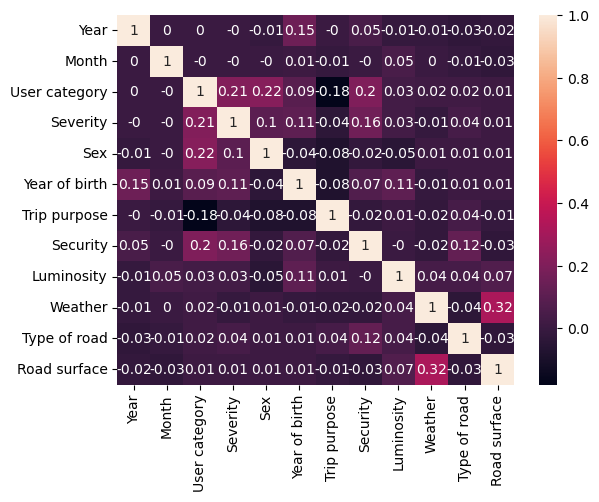

In [9]:
import seaborn as sn

sn.heatmap(datanorm.corr().round(2), annot=True)

PCA

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import euclidean_distances

#Normalization of the data
data = data.fillna(data.mean())
X = data.to_numpy()
Xstd = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
Xpca = pca.fit_transform(Xstd)

In [11]:
ccircle = []
eucl_dist = []
for i,j in enumerate(X .T):
    corr1 = np.corrcoef(j,Xpca[:,0])[0,1]
    corr2 = np.corrcoef(j,Xpca[:,1])[0,1]
    ccircle.append((corr1, corr2))
    eucl_dist.append(np.sqrt(corr1**2 + corr2**2))

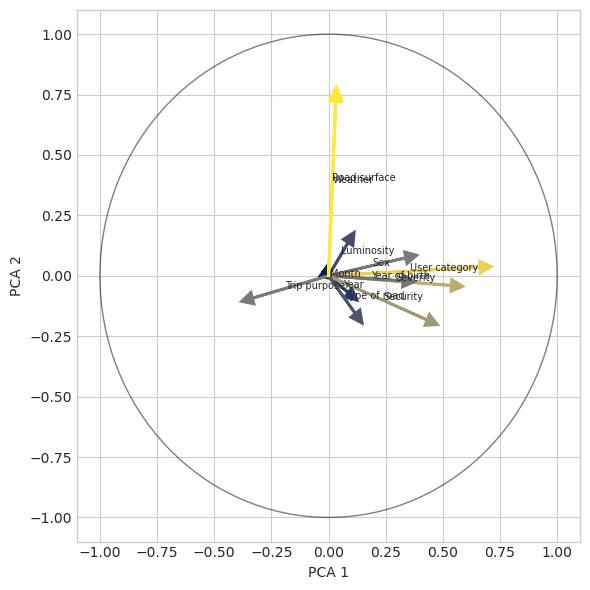

In [16]:
with plt.style.context(('seaborn-whitegrid')):
    fig, axs = plt.subplots(figsize=(6, 6))
    for i,j in enumerate(eucl_dist):
        arrow_col = plt.cm.cividis((eucl_dist[i] - np.array(eucl_dist).min())/\
                                (np.array(eucl_dist).max() - np.array(eucl_dist).min()) )
        axs.arrow(0,0, # Arrows start at the origin of the graphic
                 ccircle[i][0],  #0 for PC1
                 ccircle[i][1],  #1 for PC2
                 lw = 2, # establishment of line width
                 length_includes_head=True, 
                 color = arrow_col,
                 fc = arrow_col,
                 head_width=0.05,
                 head_length=0.05)
        # The labels of the arrows in relatively reasonable size
        axs.text(ccircle[i][0]/2,ccircle[i][1]/2, data.columns[i], fontsize=7)
    # Draw the unit circle
    circle = Circle((0, 0), 1, facecolor='none', edgecolor='k', linewidth=1, alpha=0.5)
    axs.add_patch(circle)
    axs.set_xlabel("PCA 1", fontsize=10)
    axs.set_ylabel("PCA 2", fontsize=10)

    axs.set_xlabel("PCA 1")
    axs.set_ylabel("PCA 2")
plt.tight_layout()
plt.show()